In [1]:
pip install pandas scikit-learn matplotlib graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 801.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [11]:
# Path to your local CSV file
csv_path = "C:/Users/gunde/Downloads/archive (4)/heart.csv"

# Load the CSV
df = pd.read_csv(csv_path)

# Preview the dataset
print(df.head())
print(df.info())
print(df['target'].value_counts())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [15]:
# ✅ Step 3: Preprocess the Data

# 3.1 - Drop the target column from features
X = df.drop("target", axis=1)
y = df["target"]

# Print shape to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# 3.2 - Split data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print to verify split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# 3.3 - Standardize the features (scale them)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm scaling worked
print("Scaled training sample (first row):")
print(X_train_scaled[0])


Features shape: (1025, 13)
Target shape: (1025,)
Training set size: (820, 13)
Test set size: (205, 13)
Scaled training sample (first row):
[ 0.81162633 -1.50996689 -0.90957214  0.31472862  0.89579058  2.34689934
  0.926946   -1.92115501 -0.71813066  0.69652503 -0.59754229  2.20730061
 -0.56245085]


Decision Tree (Unrestricted):
Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


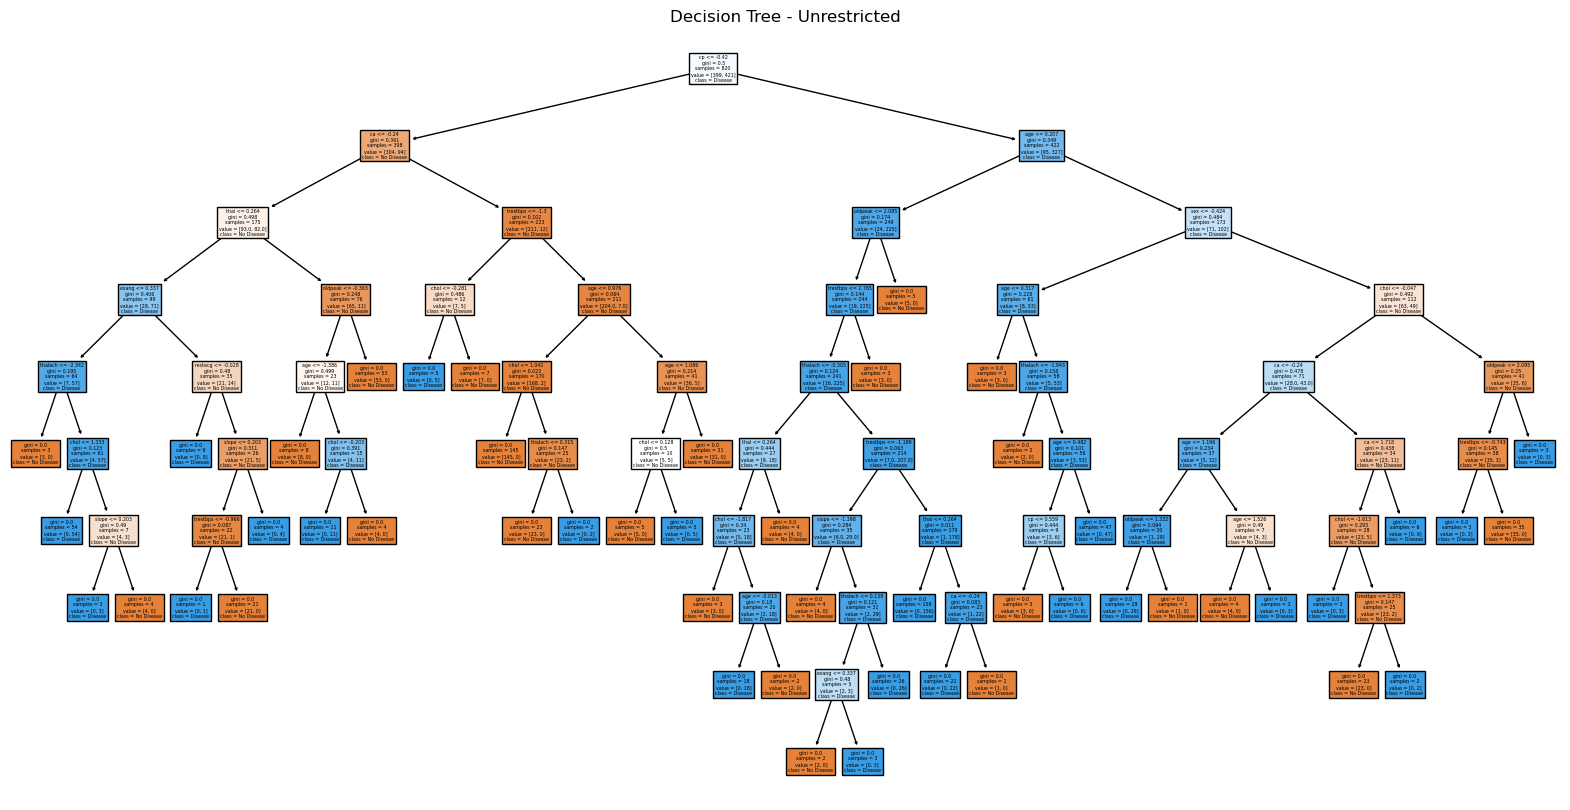

In [17]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Accuracy
print("Decision Tree (Unrestricted):")
print("Train Accuracy:", dt.score(X_train_scaled, y_train))
print("Test Accuracy:", dt.score(X_test_scaled, y_test))

# Visualize
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - Unrestricted")
plt.show()


Decision Tree (max_depth=4):
Train Accuracy: 0.8853658536585366
Test Accuracy: 0.8390243902439024


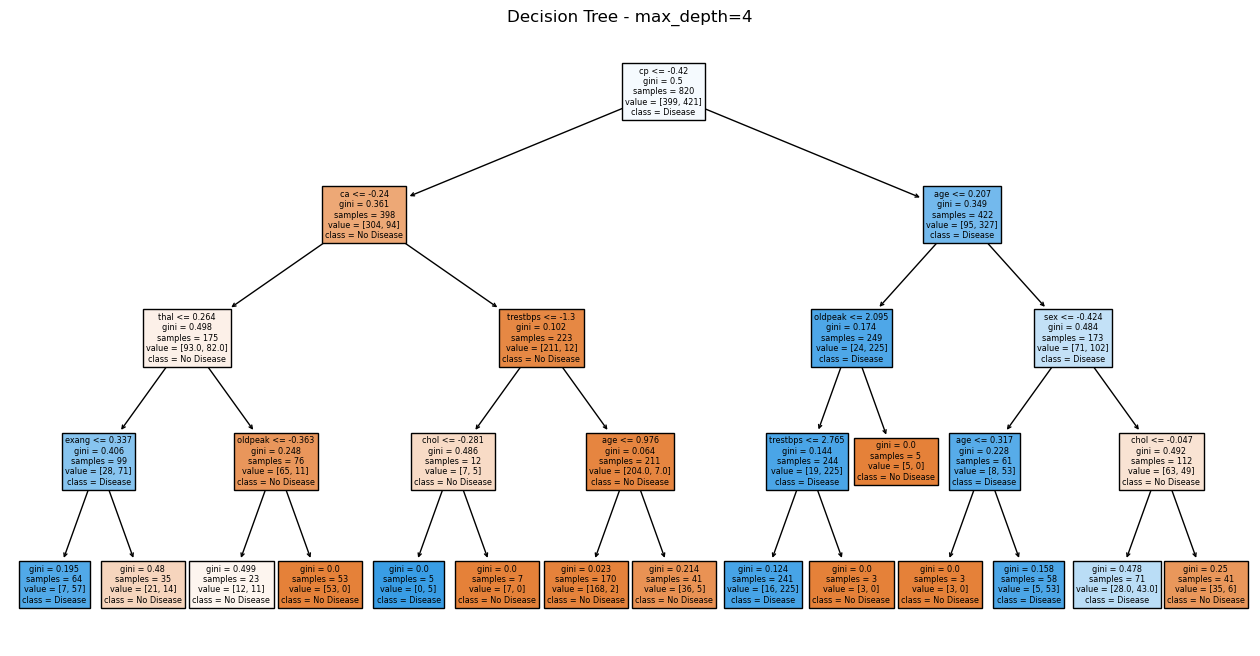

In [19]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train_scaled, y_train)

print("Decision Tree (max_depth=4):")
print("Train Accuracy:", dt_limited.score(X_train_scaled, y_train))
print("Test Accuracy:", dt_limited.score(X_test_scaled, y_test))

# Visualize
plt.figure(figsize=(16, 8))
plot_tree(dt_limited, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree - max_depth=4")
plt.show()


In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

print("Random Forest:")
print("Test Accuracy:", rf.score(X_test_scaled, y_test))


Random Forest:
Test Accuracy: 1.0


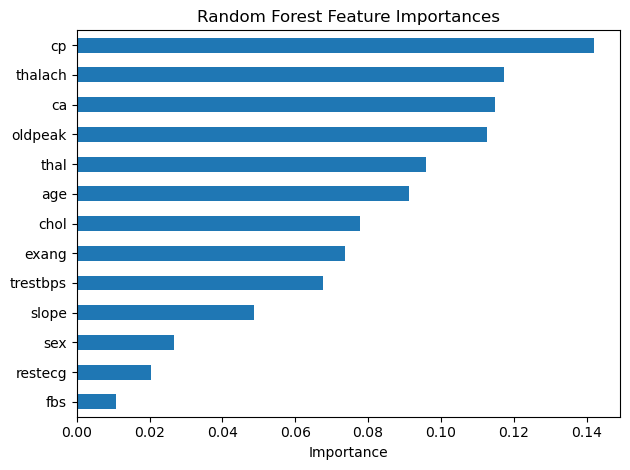

In [23]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [25]:
# Random Forest CV
rf_cv = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Scores:", rf_cv)
print("Mean Accuracy:", rf_cv.mean())

# Decision Tree (limited depth) CV
dt_cv = cross_val_score(dt_limited, X, y, cv=5)
print("Decision Tree CV Scores:", dt_cv)
print("Mean Accuracy:", dt_cv.mean())


Random Forest CV Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
Decision Tree CV Scores: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Mean Accuracy: 0.8341463414634147
